In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os

import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvTensorGraph
from deepchem.utils.save import load_from_disk
from deepchem.feat.graph_features import ConvMolFeaturizer, WeaveFeaturizer

input_data='./ChEMBL/hDAT_pIC50.csv'

tasks = ['affinity']
featurizer=WeaveFeaturizer()
#featurizer=ConvMolFeaturizer()


loader = dc.data.CSVLoader(tasks=tasks, smiles_field="canonical_smiles",featurizer=featurizer)
dataset=loader.featurize(input_data)


Loading raw samples now.
shard_size: 8192
About to start loading CSV from ./ChEMBL/hDAT_pIC50.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 4.592 s
TIMING: dataset construction took 5.263 s
Loading dataset from disk.


In [2]:
import deepchem as dc
import tempfile, shutil
from deepchem.splits.splitters import RandomSplitter

splitter=RandomSplitter()
train_data,valid_data,test_data=splitter.train_valid_test_split(dataset)



TIMING: dataset construction took 0.802 s
Loading dataset from disk.
TIMING: dataset construction took 0.268 s
Loading dataset from disk.
TIMING: dataset construction took 0.279 s
Loading dataset from disk.


In [3]:
from deepchem.models.tensorgraph.models.graph_models import GraphConvTensorGraph, WeaveTensorGraph

#model = GraphConvTensorGraph(len(tasks), dropout=0.5, batch_size=50, mode='regression',tensorboard=True, tensorboard_log_frequency=1, model_dir='./')
model = WeaveTensorGraph(len(tasks), dropout=0.5, batch_size=100, mode='regression')

from sklearn.metrics import mean_absolute_error
from deepchem.metrics import rms_score
import deepchem.hyper.grid_search

metric = dc.metrics.Metric(
    mean_absolute_error, task_averager=np.mean, mode="regression")

train_score_list = []
valid_score_list = []

model.fit(train_data, nb_epoch=500)

#or i in range(0,100):
#   model.fit(train_data, nb_epoch=10*i)

train_scores = model.evaluate(train_data, [metric])

valid_scores = model.evaluate(valid_data, [metric])
    
#   train_score_list.append(train_scores)
#   valid_score_list.append(valid_scores)
    

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Starting epoch 0
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47


Starting epoch 402
Starting epoch 403
Starting epoch 404
Starting epoch 405
Starting epoch 406
Starting epoch 407
Starting epoch 408
Starting epoch 409
Starting epoch 410
Starting epoch 411
Starting epoch 412
Starting epoch 413
Starting epoch 414
Starting epoch 415
Starting epoch 416
Starting epoch 417
Starting epoch 418
Starting epoch 419
Starting epoch 420
Starting epoch 421
Starting epoch 422
Starting epoch 423
Starting epoch 424
Starting epoch 425
Starting epoch 426
Starting epoch 427
Starting epoch 428
Starting epoch 429
Starting epoch 430
Starting epoch 431
Starting epoch 432
Starting epoch 433
Starting epoch 434
Starting epoch 435
Starting epoch 436
Starting epoch 437
Starting epoch 438
Starting epoch 439
Starting epoch 440
Starting epoch 441
Starting epoch 442
Starting epoch 443
Starting epoch 444
Starting epoch 445
Starting epoch 446
Starting epoch 447
Starting epoch 448
Starting epoch 449
Starting epoch 450
Starting epoch 451
Starting epoch 452
Starting epoch 453
Starting epo

In [4]:
#l = [x['mean-mean_absolute_error'] for x in train_score_list]

#a = np.array(l)

#np.savetxt('out.csv',a,delimiter=',')

#l2 = [x['mean-mean_absolute_error'] for x in valid_score_list]

#a = np.array(l2)

#np.savetxt('out2.csv',a,delimiter=',')


(177, 1)
(177, 1)
(177, 1)


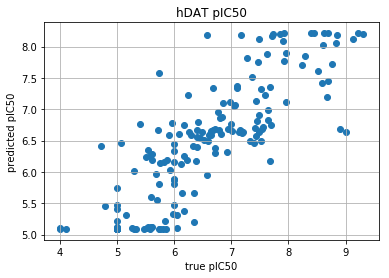

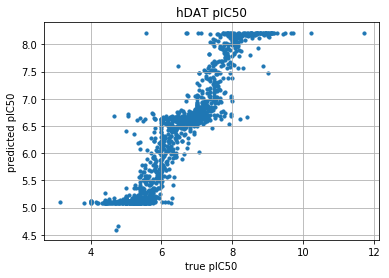

In [6]:
import matplotlib.pyplot as plt


a1 = np.reshape(valid_data.ids, (-1,1))
a2 = np.reshape(model.predict_proba(valid_data), (-1,1))
a3 = valid_data.y

print(np.shape(a1))
print(np.shape(a2))
print(np.shape(a3))


a4 = np.concatenate((a1,a2,a3), axis=1)
#print(np.shape(a4))
#print(a4)

a11 = np.reshape(train_data.ids, (-1,1))
a21 = np.reshape(model.predict_proba(train_data), (-1,1))
a31 = train_data.y

a41 = np.concatenate((a11,a21,a31), axis=1)
#print(np.shape(a41))
#print(a41)

plt.scatter(a4[:,2], a4[:,1])
plt.title("hDAT pIC50")
plt.xlabel("true pIC50")
plt.ylabel("predicted pIC50")
plt.grid(True)
plt.show()

plt.scatter(a41[:,2], a41[:,1],s=10)
plt.title("hDAT pIC50")
plt.xlabel("true pIC50")
plt.ylabel("predicted pIC50")
plt.grid(True)
plt.show()

In [7]:
import scipy as sp
from scipy.stats import pearsonr, spearmanr

x = a41[:,1].astype(np.float32)
y = a41[:,2].astype(np.float32)

print(pearsonr(x,y))
print(spearmanr(x,y))

x = a4[:,1].astype(np.float32)
y = a4[:,2].astype(np.float32)

print(pearsonr(x,y))
print(spearmanr(x,y))

(0.93337524, 0.0)
SpearmanrResult(correlation=0.9355271905416759, pvalue=0.0)
(0.8389814, 4.047578192833182e-48)
SpearmanrResult(correlation=0.858830155302161, pvalue=1.0137216938109657e-52)
